In [1]:
import os
import shutil
from IPython.display import display
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import torch
device = torch.device('mps')
print('all the import are successfull')

#importing CV realted libraries 
from torch import nn
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

all the import are successfull
PyTorch version: 2.3.0
torchvision version: 0.18.0


### Organizing the Data for train and test

In [2]:
root_dir = '/Users/mukulkumar/Desktop/ML-and-DL/project2/'
train_dir = root_dir + 'train'
test_dir = root_dir + 'test'

os.makedirs(train_dir, exist_ok= True)
os.makedirs(test_dir, exist_ok= True)

dataset_path = '/Users/mukulkumar/Desktop/ML-and-DL/Datasets/data/'
classes = os.listdir('/Users/mukulkumar/Desktop/ML-and-DL/Datasets/data/')
classes = [clas for clas in classes if clas != '.DS_Store']

if os.path.exists(train_dir):
    for each_class in classes:
        #check if the class directory is already being present or not.
        #if present then skip if not then create the directory and store the file in it
        if not os.path.exists(train_dir + '/' + each_class):
            os.mkdir(train_dir + '/' + each_class)
            print(f'directory created for: {each_class}')
            #after creating the 
        else:
            print('already exist')

if os.path.exists(test_dir):
    for each_class in classes:
        #check if the class directory is already being present or not.
        #if present then skip if not then create the directory and store the file in it
        if not os.path.exists(test_dir + '/' + each_class):
            os.mkdir(test_dir + '/' + each_class)
            print(f'directory created for: {each_class}')
            #after creating the 
        else:
            print('already exist')


#injecting data class subfolder of train and test dir
split = 0.7
for each in classes:
    each_class_files = os.listdir('/Users/mukulkumar/Desktop/ML-and-DL/Datasets/data/' + each + '/')
    split = int(len(each_class_files) * 0.7)
    train_data = each_class_files[:split]
    test_data = each_class_files[split:]
    print(f'{each} | train_length: {len(train_data)} | test_legth : {len(test_data)}')

    #copyinf each file to respected class folder
    if len(os.listdir(train_dir + '/' + each)) == 0:
        for train_sample in train_data:
            shutil.copy(src= dataset_path + each + '/' + train_sample,dst= train_dir + '/' + each + '/' + train_sample)
    if len(os.listdir(test_dir + '/' + each)) == 0:
        for test_sample in test_data:
            shutil.copy(src= dataset_path + each + '/' + test_sample,dst= test_dir + '/' + each + '/' + test_sample)




already exist
already exist
already exist
already exist
already exist
already exist
already exist
already exist
cloudy | train_length: 1050 | test_legth : 450
water | train_length: 1050 | test_legth : 450
green_area | train_length: 1050 | test_legth : 450
desert | train_length: 791 | test_legth : 340


#### DataLoaders and Visualizing the dataset

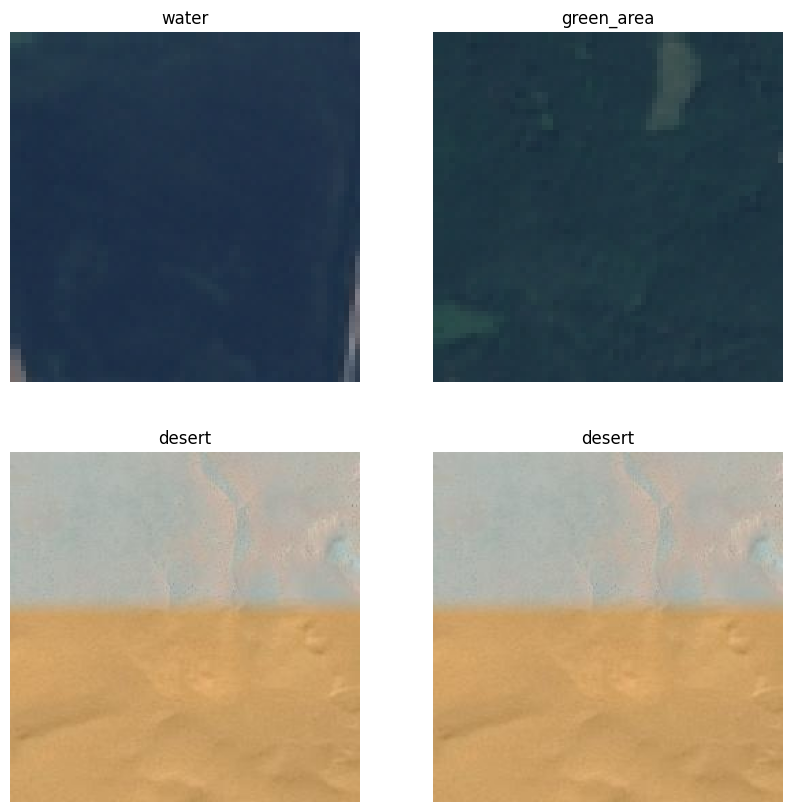

In [3]:
#visualising the dataset
rows = 2
cols = 2
plt.figure(figsize=(10,10))
for i in range(len(classes)):
    rdx_idx = np.random.randint(0, len(classes))
    cls = classes[rdx_idx]
    img_list = os.listdir(train_dir + '/' + cls + '/')
    image = img_list[rdx_idx]
    image = mpimg.imread(train_dir + '/' + cls + '/' + image)
    plt.subplot(rows,cols, i+1)
    plt.imshow(image)
    plt.axis(False)
    plt.title(cls)
    

In [4]:
#creating the train, test dataset with transformation and also create the Loaders
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

#generating the train and test dataset
train_data = datasets.ImageFolder(root= train_dir, transform= data_transform)
test_data = datasets.ImageFolder(root=test_dir, transform= data_transform)
print(train_data,test_data, sep = '\n')

#defining the data loader
train_loader = DataLoader(dataset= train_data, batch_size=64, shuffle= True)
test_loader = DataLoader(dataset=test_data, batch_size=64, shuffle= True)

Dataset ImageFolder
    Number of datapoints: 3941
    Root location: /Users/mukulkumar/Desktop/ML-and-DL/project2/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 1690
    Root location: /Users/mukulkumar/Desktop/ML-and-DL/project2/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


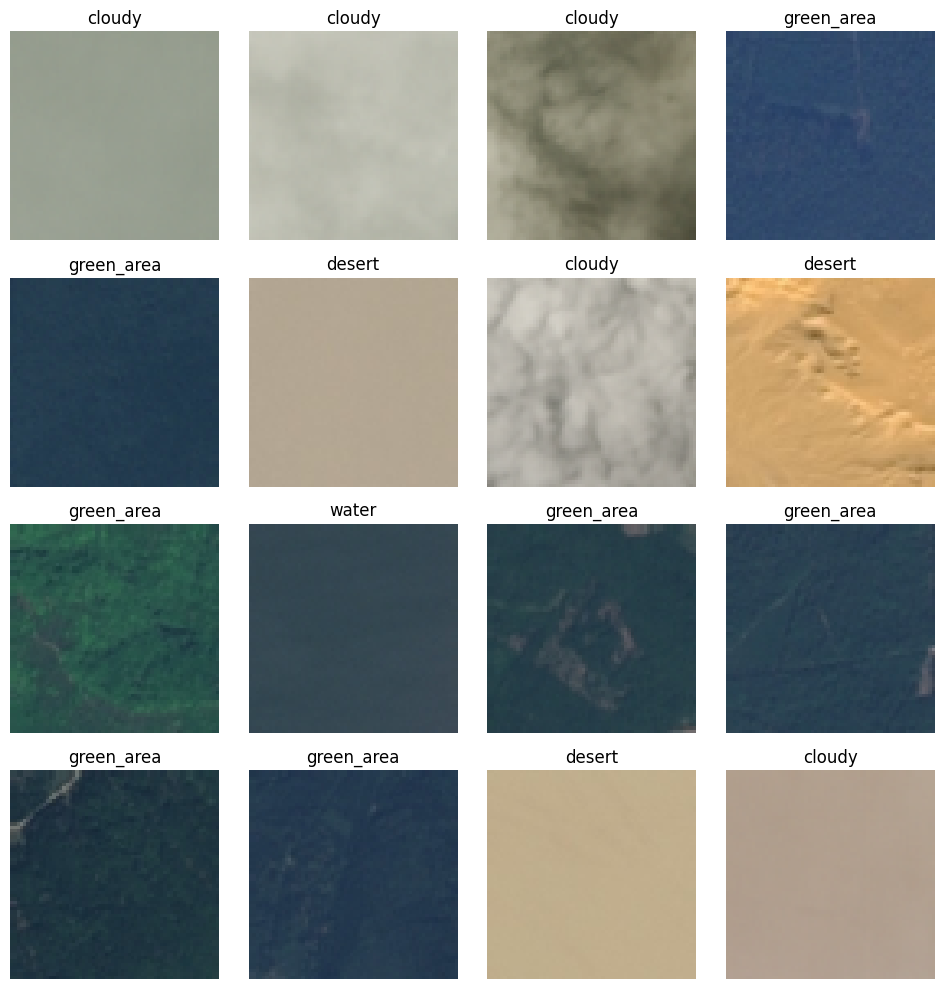

In [5]:
#plotting random images from the train_dataset with class labels
class_name = train_data.classes  #by default method to get the classes in pytorch
n_rows = 4
n_cols = 4
torch.manual_seed(42)
plt.figure(figsize=(10,10))
for i in range(1, n_rows*n_cols + 1):
    idx = np.random.randint(0,len(train_data))
    image, label = train_data[idx]
    #to show an image the format has to be (H,W,C) not (C,H,W)
    img_array = image.permute(1,2,0).numpy()
    plt.subplot(n_rows,n_cols,i)
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(class_name[label])
    plt.axis(False)
    plt.tight_layout()

### Classification using Dense

In [6]:
class model_0(nn.Module):
    def __init__(self):
        super().__init__()
        #flatten the input image as NN input is in vectopr form
        self.layer1 = nn.Linear(in_features=64*64*3, out_features=1024)
        self.layer2 = nn.Linear(in_features=1024, out_features=512)
        self.layer3 = nn.Linear(in_features=512, out_features=512)
        self.layer4 = nn.Linear(in_features=512, out_features=128)
        self.layer5 = nn.Linear(in_features=128, out_features=4)
        self.relu = nn.ReLU()
    
    #defining the forward pass
    def forward(self,x):
        flattened_output = x.view(-1, 64*64*3)
        out1 = self.relu(self.layer1(flattened_output))
        out2 = self.relu(self.layer2(out1))
        out3 = self.relu(self.layer3(out2))
        out4 = self.relu(self.layer4(out3))
        output_logits = self.layer5(out4)   #output layer
        return output_logits

#initiate the model

model0 = model_0().to(device=device)
model0



model_0(
  (layer1): Linear(in_features=12288, out_features=1024, bias=True)
  (layer2): Linear(in_features=1024, out_features=512, bias=True)
  (layer3): Linear(in_features=512, out_features=512, bias=True)
  (layer4): Linear(in_features=512, out_features=128, bias=True)
  (layer5): Linear(in_features=128, out_features=4, bias=True)
  (relu): ReLU()
)

In [7]:
#set up the loss function and the optimizer and accuracy
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model0.parameters(), lr = 0.0001)

def accuracy_fun(y_pred,y_true):
    correct = torch.eq(y_pred, y_true).sum().item()
    acc = (correct/len(y_true))*100
    return acc

In [8]:
#define the training and testing

torch.manual_seed(42)

epochs = 20
epoch_count = []
training_loss = []
training_acc = []

for epoch in range(epochs):
    print(f"Epoch No: {epoch}\n-------")

    #training the model
    train_loss = 0
    train_accuracy = 0

    for batch, (X,y) in enumerate(train_loader):

        #send to device
        X = X.to(device)
        y = y.to(device)
        model0.train()

        #forward pass
        y_logits = model0(X)
        y_pred = torch.softmax(y_logits,dim=1)
        y_pred = torch.argmax(y_pred,dim=1)

        #calculate the loss for the batch
        loss = loss_fun(y_logits, y)
        #sum all the training loss of the batches in one epoch
        train_loss = train_loss + loss

        #calulate accuracy for each batch
        train_acc = accuracy_fun(y_true=y, y_pred=y_pred)
        train_accuracy = train_accuracy + train_acc

        #optimizer zero grad
        optimizer.zero_grad()

        #loss backward
        loss.backward()

        #update the weight
        optimizer.step()

    #print('the reuslt after each epoch)
    train_loss = train_loss/len(train_loader)
    train_accuracy = train_accuracy/len(train_loader)
    epoch_count.append(epoch)
    training_loss.append(train_loss.cpu().item())
    training_acc.append(train_accuracy)
    print(f'batch : {batch} | train_loss = {train_loss} | train_accurracy: {train_accuracy}')
        



Epoch No: 0
-------
batch : 61 | train_loss = 0.9009986519813538 | train_accurracy: 56.46932214472537
Epoch No: 1
-------
batch : 61 | train_loss = 0.4687289595603943 | train_accurracy: 78.92872711421099
Epoch No: 2
-------
batch : 61 | train_loss = 0.4460875988006592 | train_accurracy: 81.30925784655624
Epoch No: 3
-------
batch : 61 | train_loss = 0.4020904004573822 | train_accurracy: 82.81658674803836
Epoch No: 4
-------
batch : 61 | train_loss = 0.39321330189704895 | train_accurracy: 83.2586366608544
Epoch No: 5
-------
batch : 61 | train_loss = 0.4033125936985016 | train_accurracy: 82.62178509154316
Epoch No: 6
-------
batch : 61 | train_loss = 0.3776971697807312 | train_accurracy: 84.38862249346121
Epoch No: 7
-------
batch : 61 | train_loss = 0.3896847665309906 | train_accurracy: 83.10061573670446
Epoch No: 8
-------
batch : 61 | train_loss = 0.3780389130115509 | train_accurracy: 83.41461421098518
Epoch No: 9
-------
batch : 61 | train_loss = 0.36602118611335754 | train_accurrac

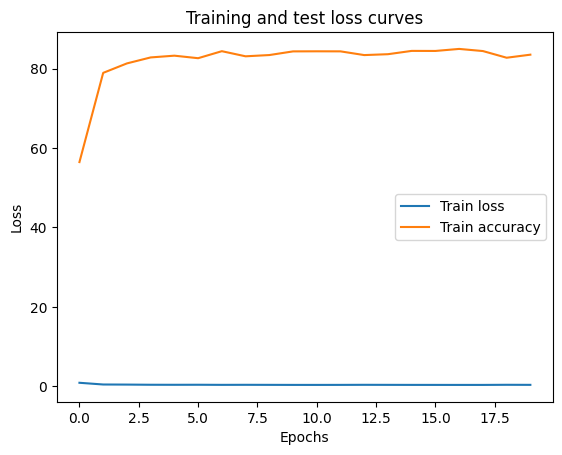

In [9]:
plt.plot(epoch_count, training_loss, label="Train loss")
plt.plot(epoch_count, training_acc, label="Train accuracy")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### CNN architecture for classification

In [10]:
#defining the model architecture for the same
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size= 3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv4 = nn.Conv2d(64,32, kernel_size= 3)
        self.conv5 = nn.Conv2d(32, 32, kernel_size=3)
        self.bn = nn.BatchNorm2d(32)
        self.flatten = nn.Flatten()
        self.pool = nn.MaxPool2d(2,2)
        self.relu = nn.ReLU()

        #classification layer
        self.fc1 = nn.Linear(28*28*32, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 4)

        #defining the classification module
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv4(x))
        x = self.relu(self.conv5(x))
        x = self.pool(x)
        x = self.bn(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        output = self.fc4(x)
        return output


model1 = CNN().to(device)
model1

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc1): Linear(in_features=25088, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=4, bias=True)
)

In [11]:
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model1.parameters(), lr = 0.0001)

def accuracy_fun(y_pred,y_true):
    correct = torch.eq(y_pred, y_true).sum().item()
    acc = (correct/len(y_true))*100
    return acc

In [12]:
#define the training and testing

torch.manual_seed(42)

epochs = 20
epoch_count = []
training_loss = []
training_acc = []

for epoch in range(epochs):
    print(f"Epoch No: {epoch}\n-------")

    #training the model
    train_loss = 0
    train_accuracy = 0

    for batch, data in enumerate(train_loader):
        X, y = data
        #send to device
        X = X.to(device)
        y = y.to(device)
        model1.train()

        #forward pass
        y_logits = model1(X)
        y_pred = torch.softmax(y_logits,dim=1)
        y_pred = torch.argmax(y_pred,dim=1)

        #calculate the loss for the batch
        loss = loss_fun(y_logits, y)
        #sum all the training loss of the batches in one epoch
        train_loss = train_loss + loss

        #calulate accuracy for each batch
        train_acc = accuracy_fun(y_true=y, y_pred=y_pred)
        train_accuracy = train_accuracy + train_acc

        #optimizer zero grad
        optimizer.zero_grad()

        #loss backward
        loss.backward()

        #update the weight
        optimizer.step()

    #print('the reuslt after each epoch)
    train_loss = train_loss/len(train_loader)
    train_accuracy = train_accuracy/len(train_loader)
    epoch_count.append(epoch)
    training_loss.append(train_loss.cpu().item())
    training_acc.append(train_accuracy)
    print(f'batch : {batch} | train_loss = {train_loss} | train_accurracy: {train_accuracy}')
        



Epoch No: 0
-------
batch : 61 | train_loss = 0.4868110716342926 | train_accurracy: 77.196627070619
Epoch No: 1
-------
batch : 61 | train_loss = 0.3089587390422821 | train_accurracy: 87.01163360941588
Epoch No: 2
-------
batch : 61 | train_loss = 0.2525731921195984 | train_accurracy: 90.16660309503051
Epoch No: 3
-------
batch : 61 | train_loss = 0.22667710483074188 | train_accurracy: 90.52146904969486
Epoch No: 4
-------
batch : 61 | train_loss = 0.20953775942325592 | train_accurracy: 91.6235287707062
Epoch No: 5
-------
batch : 61 | train_loss = 0.1998714655637741 | train_accurracy: 92.15071926765476
Epoch No: 6
-------
batch : 61 | train_loss = 0.1829010397195816 | train_accurracy: 93.21599825632083
Epoch No: 7
-------
batch : 61 | train_loss = 0.13620291650295258 | train_accurracy: 94.96648866608544
Epoch No: 8
-------
batch : 61 | train_loss = 0.13214100897312164 | train_accurracy: 95.05571599825632
Epoch No: 9
-------
batch : 61 | train_loss = 0.13269904255867004 | train_accurra